## S.6 Gradient 알고리즘


### gradient란?
기울기 하강법 Gradient decent algorithm은 **오류를 계산하고, 반복을 통해 이를 점진적으로 줄여가면서 최적해**를 찾는다.
gradient는 경사도를 말한다.
처음에는 무작위 값에서 출발하여, 오류를 줄여가는 방향으로 경사도를 줄여가며 최적해를 찾아가게 된다.
경사방법 Gradient algorithm은 **greedy 탐욕알고리즘**으로, 경사도를 선택하여 답을 찾아가지만, 그 답이 최적이라는 보장은 없다.
오류함수가 2차함수인 경우 **local optimum**이 곧 global optimum이 된다.
탐욕적으로 계속 최적해를 구해나가야 한다.

OLS방법을 보편적으로 사용한다. 편미분해서 풀 수 있지만, 변인의 갯수만큼 방정식을 풀어야 한다.
극대점을 찾기 위해서는 gradient 방향으로 오르는 것을 gradient ascent, 반대는 gradient descent(ascent)로 반복을 하면서 계수를 구한다.
(matrix 연산은 $n^{2.373}$이 소요된다는 연구)

### 회귀식

우리가 찾고자 하는 회귀식 $h(x)$은 x를 선형적으로 $\theta$가중치를 곱해서 더한 함수로 나타낸다.
앞서의 회귀식과 동일하고, 기호만 다르게 사용되었다.
$h_{\theta}(x) = \theta_0x_0 + \theta_1x_1 + \ldots + \theta_nx_n$

이를 줄여서 표현하면:
$h_{\theta}(x)= \theta_{0} + \sum_{i=1}^n(\theta^Tx)$  ($x_0=1$)

### 오류
이 회귀식의 오류, 즉 $h(x) - y$는 **MSE Mean Squared Error**로 다음과 같이 나타낼수 있다.
예측과 실제의 차이를 서로 상쇄하지 않도록 제곱을 하고, 갯수로 나누어 평균으로 계산된다.

$J(\theta) = \frac{1}{n} \sum_{i=1}^n (h_{\theta}(x^{(i)}) - y^{(i)})^2$

이 식이 최소화할 수 있는 가중치 $\theta$를 추정한다.

### 경사도 계산

gradient는 그 점에서의 **기울기**로서 방향, 크기를 나타낸다.
벡터의 gradient는 '각 변수에 대한 편미분 벡터'이다.

$\nabla f(x,y)= \frac{\partial{f}}{\partial{x}},
                  \frac{\partial{f}}{\partial{y}}$

$x_{n+1}=x_n-\alpha_n \nabla f(x_n),\ n \ge 0$이면
$f(x_0)\ge f(x_1)\ge f(x_2)\ge \cdots$이므로 `오류를 줄여나가는 방향` 결국 **최소값 local minimum**에 도달하게 된다.

$\alpha$는 학습율을 말한다.

앞서 정의한 오류 $J(\theta)$에 대해 gradient를 구하려면, 편미분을 해준다.

$
\begin{align}
\frac{\partial}{\partial{\theta_j}}J(\theta)
    &=\frac{\partial}{\partial{\theta_j}} \frac{1}{n} (h_{\theta}(x) - y)^2\\
    &=2 \cdot \frac{1}{n} (h_{\theta}(x) - y) \cdot \frac{\partial}{\partial{\theta_j}} (h_{\theta}(x) - y)\\
    &=\frac{2}{n}\cdot (h_{\theta}(x) - y) \cdot \frac{\partial}{\partial{\theta_j}} (\sum_{i=0}^n \theta_i x_i - y)\\
    &=\frac{2}{n}\cdot (h_{\theta}(x) - y) x_j
\end{align}
$

n은평균 2는 미분해서 앞으로온것 (크게 신경 안써도됨)  
위 식을 보면, **gradient는 오류에 x를 dot연산**해서 얻어진다.


### 갱신

$\alpha$는 학습비율 Learning Rate이며, 아래 값이 처음에는 큰 값으로 조정하다가, 반복이 계속될수록 적어지면서 0에 가까워질 때까지 현재 $\theta$를 갱신해 나간다. 앞 2/n는 학습비율이 정해지면 서로 곱해져서 의미가 적어지게 된다.

$\theta_j := \theta_j - \alpha\frac{2}{n}(h_\theta(x)-y)x_{j})$

### 상수항을 넣어서 계산

$h_\theta(x)$를 아래와 같이 전개하고 계산해도 마찬가지이다. **$x_0=1$이면 전개할 필요가 없다.**

* $J(\theta)$ $MSE =\frac{1}{n} \sum_{i=1}^n((ax_i+b) - y_i)^2$

오류를 편미분해서 기울기 gradient를 a,b에 대해 구하면 다음과 같다.
* $\frac{\partial}{\partial{a}}
    =\frac{2}{n} \sum_{i=1}^n((ax_i+b) - y_i) (x_i)$　　　# x의 속성에 대한
* $\frac{\partial}{\partial{b}}
    =\frac{2}{n} \sum_{i=1}^n((ax_i+b) - y_i) (1)$　　　#상수에 대한

### 알고리즘

* 모든 계수 $\theta = 1$ (또는 무작위), $\alpha$ 설정
* 반복
    * $\theta$ 갱신
        * $\theta_j := \theta_j - \alpha \frac{\partial}{\partial{\theta_j}}J(\theta)$

실제와 예측의 차이인 **오류 $(y-yhat)^2$를 최소화**하는 베타 값을 구해보자.

### 단계 1: 설정

#### 데이터

x와 y를 설정하자. 

In [1]:
import numpy as np

x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
#x=np.array([0.5,2.3,2.9])
#y=np.array([1.4,1.9,3.2])

x에 상수항을 넣어준다.

In [2]:
x=np.array([x, np.ones(len(x))])  # w0 * x0 + w1 * x1

x의 shape을 컬럼 속성으로 맞추어 주기 위해 x.T로 해서, 현재 2,4 -> 4,2로 맞추어 준다.

In [3]:
x=x.T

In [4]:
x, x.shape

(array([[1., 1.],
        [2., 1.],
        [3., 1.],
        [4., 1.]]),
 (4, 2))

#### 학습비율
alpha는 학습율에 따라, 즉 반복마다 경사도의 일정비율만큼 감소시켜주게 된다.

In [5]:
alpha = 0.01

#### weights 초기화

우리가 구하려는 theta는 처음에 1로 설정한다.
속성 갯수 2개로 맞추어 준다.

In [6]:
theta=np.array(np.ones([x.shape[1]]))

In [7]:
theta

array([1., 1.])

### 단계 2: gradient

#### h(x)

h(x)는 $x_1 \times \theta_{1} + x_0 \times \theta_{0}$으로 계산된다.
따라서:
```python
h(0) = (1 * 1 + 1 * 1) = 2
h(1) = (2 * 1 + 1 * 1) = 3
h(2) = (3 * 1 + 1 * 1) = 4
h(3) = (4 * 1 + 1 * 1) = 5
```

벡터 곱셈은 합계까지 구하지 않고, 요소별 곱셈만 한다.

In [8]:
x*theta

array([[1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.]])

벡터는 dot연산으로 h(x)의 결과를 계산할 수 있다.

In [9]:
np.dot(x, theta)

array([2., 3., 4., 5.])

함수로 만들어보자.

In [10]:
def h(x, theta):
    return np.dot(x, theta)

h(x,theta)

array([2., 3., 4., 5.])

#### 단순 오류

h - y, 즉 예측 - 실제의 차이를 계산한다.

In [11]:
error=h(x,theta)-y

In [12]:
f"simple error y-h: {error}"

'simple error y-h: [-4. -2. -3. -5.]'

#### gradient

```python
np.sum(y-h)*(-2)/len(x)의 결과는 -7
np.sum((y-h)*x)*(-2)/len(x) 결과는 -18.5
```

#### 상수항

아래 결과는 x 길이로 나누어주어서 그렇다.

In [13]:
np.sum(h(x,theta)-y)*(2)/len(x)

-7.0

#### x에 대한 w

dot연산을 해줄 경우 shape에 유의한다.
* ```x.T```는 ```(2,4)```,
* ```h(x,theta)```는 ```(4,)```,
* ```(2,4)```와 ```(4,)```를 dot연산을 하면 -> ```(2, )``` 결과가 계산된다.

In [14]:
np.sum(x.T*(h(x,theta)-y), axis=1)*(2)/len(x)

array([-18.5,  -7. ])

#### dot연산으로 한꺼번에 계산

$x_0$은 1이므로 위는 ```np.dot(x.T,error)```로 바꿔쓸 수 있다.

In [15]:
gradient=np.dot(x.T,error)*(2)/len(x)

In [16]:
f"gradient: {gradient}"

'gradient: [-18.5  -7. ]'

### 단계 3: update

기울기에 학습률을 곱하여 theta를 갱신하게 된다.

In [17]:
theta -= alpha*gradient

x의 모양은 (4,2)이고 컬럼2에 상수값을 가지고 있으므로, 아래 값은 w1, w0의 값이다.

In [18]:
f"theta: {theta}" #업데이트됨

'theta: [1.185 1.07 ]'

### 단계 4: 반복 및 종료

1회 반복이 종료되었고 다음 반복을 해보자.

In [19]:
x

array([[1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.]])

In [20]:
y

array([ 6,  5,  7, 10])

In [21]:
theta=np.array(np.ones([x.shape[1]]))

In [22]:
def gradientDescent(x,y,theta,alpha,numIterations):
    #alpha=0.01
    #theta=np.ones([x.shape[1]]) # 2 of(4,2)
    #i=0
    #numIterations=10000
    #oldCost=-np.inf
    #cost=np.inf
    for i in range(numIterations):
        #i+=1
        h=np.dot(x,theta)
        error=h-y
        #oldCost=cost
        cost=np.sum((h-y)**2)/len(x) #full MSE
        #cost=np.sum((h-y)**2)/(2*len(X)) #Half MSE
        #gradient=[np.sum(h-y)*2,np.sum((h-y)*x)*2]
        gradient=np.dot(x.T,error)*2/len(x) #w0,w1
        theta-=alpha*gradient
        if i%100==0:
            print("Iteration {0} | theta{1} Cost {2:.5f}".format(i,theta,cost))

    return theta

In [23]:
gradientDescent(x, y, theta, alpha, 10000)

Iteration 0 | theta[1.185 1.07 ] Cost 13.50000
Iteration 100 | theta[1.93236759 1.93477432] Cost 1.46163
Iteration 200 | theta[1.79445099 2.34026598] Cost 1.27598
Iteration 300 | theta[1.69226343 2.64070986] Cost 1.17406
Iteration 400 | theta[1.61654887 2.86331993] Cost 1.11811
Iteration 500 | theta[1.56044912 3.02826002] Cost 1.08739
Iteration 600 | theta[1.51888273 3.15047027] Cost 1.07053
Iteration 700 | theta[1.48808464 3.2410204 ] Cost 1.06127
Iteration 800 | theta[1.46526519 3.30811237] Cost 1.05619
Iteration 900 | theta[1.44835741 3.35782331] Cost 1.05340
Iteration 1000 | theta[1.43582981 3.39465599] Cost 1.05186
Iteration 1100 | theta[1.42654764 3.4219467 ] Cost 1.05102
Iteration 1200 | theta[1.41967014 3.4421674 ] Cost 1.05056
Iteration 1300 | theta[1.41457434 3.45714967] Cost 1.05031
Iteration 1400 | theta[1.41079867 3.4682506 ] Cost 1.05017
Iteration 1500 | theta[1.40800114 3.47647568] Cost 1.05009
Iteration 1600 | theta[1.40592834 3.48256996] Cost 1.05005
Iteration 1700 | t

array([1.4, 3.5])

### Python List 데이터의 Gradient Descent

#### 함수

리스트를 사용하면 벡터와 달리 반복문을 사용하는 것이 필요하다.
앞서 행렬을 사용한 것과 달리, 상수항에 대한 w0을 별도로 계산하고 있다.

In [25]:
import random

def computeAvgError(a,b,x,y):
    totalError = 0
    for i in range(0, len(x)):
        totalError += (y[i] - (a + b* x[i])) ** 2
    return totalError / float(len(x))

#x: attribute, 1d float array or list
#y: class, 1d int array
#alpha: learning rate
def gradientDescentL(x,y,alpha,iter): #list 방식으로 gradient Descent 푸는 함수
    a=random.random()
    b=random.random()
    #alpha=0.01
    n=len(x)
    for j in range(iter):
        aGradient = 0
        bGradient = 0
        for i in range(n):
            aGradient += (2./n) * (((a + b * x[i])) - y[i])*(1)
            bGradient += (2./n) * (((a + b * x[i])) - y[i])*(x[i])
            #aGradient += (2./n) * (y[i] - ((a + b * x[i])))*(-1)
            #bGradient += (2./n) * (y[i] - ((a + b * x[i])))*(-x[i])
        a = a - (alpha * aGradient)
        b = b - (alpha * bGradient)
        if (j%100==0):
            print ("iter:{0} a={1:.3f} b={2:.3f} AvgError={3:.3f}".format(j,a,b,computeAvgError(a,b,x,y)))
    return a, b

#### 데이터

앞서 데이터는 상수항을 추가하였지만, 여기서는 w계산을 별도로 하기 때문에 상수항이 없게 된다.

In [26]:
#x=np.array([1,2,3,4])
#y=np.array([6,5,7,10])
x=[1,2,3,4]
y=[6,5,7,10]

#### 실행

a, b가 무작위로 설정되었으니 실행을 여러 번 해보면 초반의 출력결과가 다르게 되지만,
결국 동일한 값에 수렴하게 된다.

In [27]:
alpha = 0.01
a,b=gradientDescentL(x,y,alpha,5000)

iter:0 a=0.420 b=0.954 AvgError=18.895
iter:100 a=1.555 b=2.062 AvgError=1.682
iter:200 a=2.059 b=1.890 AvgError=1.397
iter:300 a=2.432 b=1.763 AvgError=1.240
iter:400 a=2.709 b=1.669 AvgError=1.155
iter:500 a=2.914 b=1.599 AvgError=1.107
iter:600 a=3.066 b=1.548 AvgError=1.082
iter:700 a=3.178 b=1.509 AvgError=1.067
iter:800 a=3.262 b=1.481 AvgError=1.059
iter:900 a=3.323 b=1.460 AvgError=1.055
iter:1000 a=3.369 b=1.445 AvgError=1.053
iter:1100 a=3.403 b=1.433 AvgError=1.052
iter:1200 a=3.428 b=1.424 AvgError=1.051
iter:1300 a=3.447 b=1.418 AvgError=1.050
iter:1400 a=3.461 b=1.413 AvgError=1.050
iter:1500 a=3.471 b=1.410 AvgError=1.050
iter:1600 a=3.478 b=1.407 AvgError=1.050
iter:1700 a=3.484 b=1.405 AvgError=1.050
iter:1800 a=3.488 b=1.404 AvgError=1.050
iter:1900 a=3.491 b=1.403 AvgError=1.050
iter:2000 a=3.493 b=1.402 AvgError=1.050
iter:2100 a=3.495 b=1.402 AvgError=1.050
iter:2200 a=3.496 b=1.401 AvgError=1.050
iter:2300 a=3.497 b=1.401 AvgError=1.050
iter:2400 a=3.498 b=1.401 A

#### w 출력

함수에서는 소수점 3자리로 출력하지만, 있는 그대로 출력하면 소수점에 다소의 차이가 있다.

In [28]:
print("---> a={0}, b={1} after iterations".format(a,b)) #정밀도때문에 위에랑 약간 다른것(위에는 소수점 3자리정도..?)

---> a=3.4999991880367722, b=1.4000002761665138 after iterations


#### 예측

In [29]:
yhat=list()
for i in range(len(x)):
    yhat.append(a + b*x[i])

In [30]:
yhat

[4.899999464203286, 6.2999997403698, 7.700000016536313, 9.100000292702827]

#### 그래프

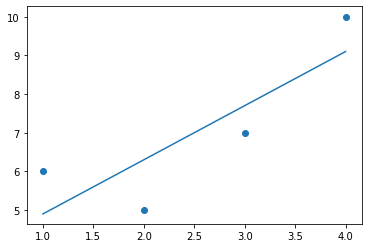

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.plot(x,yhat)
plt.show()